<a href="https://colab.research.google.com/github/RyanZha0/CIENE-4012/blob/main/Combination%20of%20two%20datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

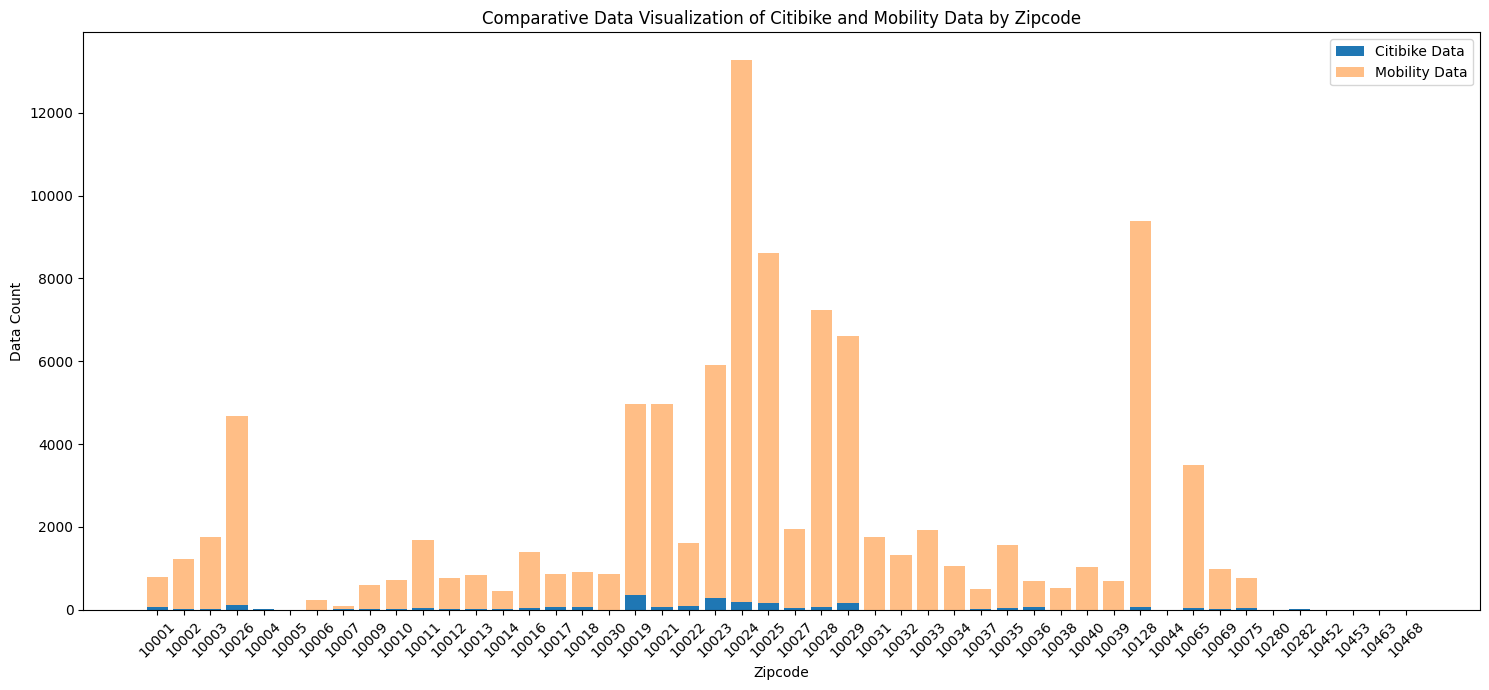

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('ratio.csv')

data

# Data cleaning: Drop unnecessary columns and rows with NaN values
cleaned_data = data[['zipcode', 'citibike_data', 'mobility_data']].dropna()

# Convert 'zipcode' to int to remove the decimal point
cleaned_data['zipcode'] = cleaned_data['zipcode'].astype(int)

# Plotting
plt.figure(figsize=(15,7))
plt.bar(cleaned_data['zipcode'].astype(str), cleaned_data['citibike_data'], label='Citibike Data')
plt.bar(cleaned_data['zipcode'].astype(str), cleaned_data['mobility_data'], bottom=cleaned_data['citibike_data'], label='Mobility Data', alpha=0.5)

# Adding labels and title
plt.xlabel('Zipcode')
plt.ylabel('Data Count')
plt.title('Comparative Data Visualization of Citibike and Mobility Data by Zipcode')
plt.legend()

# Beautifying the ticks
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


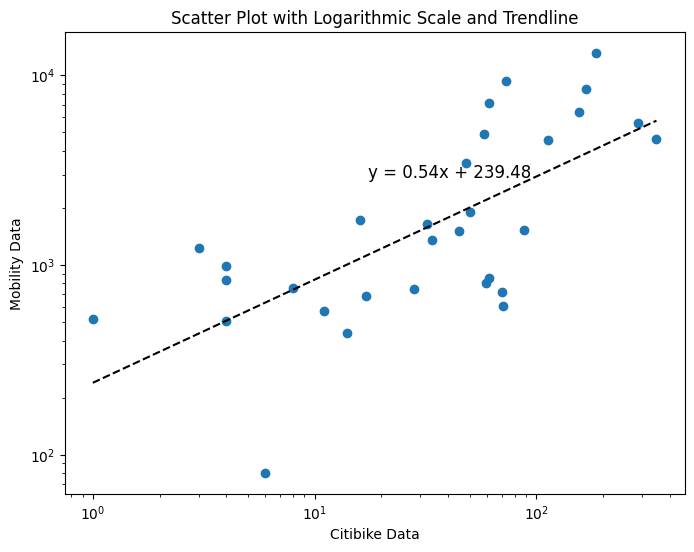

In [ ]:
import numpy as np

# Scatter plot requires two numerical variables, we can use 'citibike_data' and 'mobility_data' for this.
# Applying logarithmic scale requires non-zero values, hence we need to filter out zero values.
scatter_data = cleaned_data[(cleaned_data['citibike_data'] > 0) & (cleaned_data['mobility_data'] > 0)]

# Now let's create a scatter plot with a logarithmic scale
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['citibike_data'], scatter_data['mobility_data'])

# Set the scale of x and y axis to logarithmic
plt.xscale('log')
plt.yscale('log')

# Adding a trendline requires calculating the polynomial fit. We'll use a linear fit (degree 1) for log-log scale.
coefficients = np.polyfit(np.log(scatter_data['citibike_data']), np.log(scatter_data['mobility_data']), 1)

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate a sequence of x values spanning the range of 'citibike_data' values
x_values = np.linspace(min(scatter_data['citibike_data']), max(scatter_data['citibike_data']), 100)

# Calculate the corresponding y values from the polynomial function
y_values = np.exp(polynomial(np.log(x_values)))

# Plot the trendline
plt.plot(x_values, y_values, linestyle='--', color='black')

# Adding labels and title
plt.xlabel('Citibike Data')
plt.ylabel('Mobility Data')
plt.title('Scatter Plot with Logarithmic Scale and Trendline')

# Show the equation of the trendline
plt.text(max(x_values)*0.05, max(y_values)*0.5, f'y = {coefficients[0]:.2f}x + {np.exp(coefficients[1]):.2f}', fontsize=12)

plt.show()
